In [4]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

!kaggle datasets download -d jayaantanaath/student-habits-vs-academic-performance

!unzip "student-habits-vs-academic-performance"

Dataset URL: https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance
License(s): apache-2.0
student-habits-vs-academic-performance.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  student-habits-vs-academic-performance.zip
  inflating: student_habits_performance.csv  


# **Load dataset**

In [22]:
import pandas as pd

df = pd.read_csv('student_habits_performance.csv')

print("Dataset shape:", df.shape)

print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isnull().sum())

Dataset shape: (1000, 16)

Data types:
student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: object

Missing values per column:
student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_

# **EDA - Summary Statistics and Target Variable Distribution**


Summary statistics:
             age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.0000           1000.00000         1000.000000    1000.000000   
mean     20.4980              3.55010            2.505500       1.819700   
std       2.3081              1.46889            1.172422       1.075118   
min      17.0000              0.00000            0.000000       0.000000   
25%      18.7500              2.60000            1.700000       1.000000   
50%      20.0000              3.50000            2.500000       1.800000   
75%      23.0000              4.50000            3.300000       2.525000   
max      24.0000              8.30000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count            1000.000000  1000.000000         1000.000000   
mean               84.131700     6.470100            3.042000   
std                 9.399246     1.226377            2.025423   
min                56.000000     3

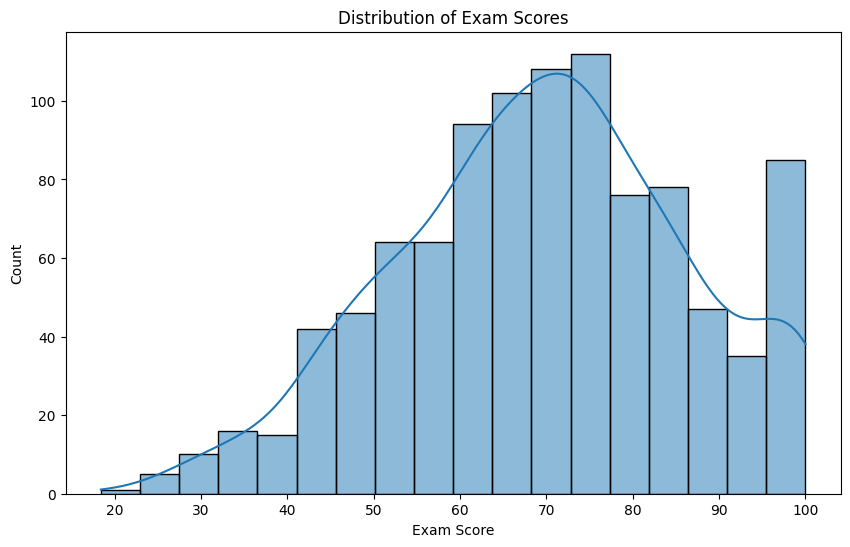

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("\nSummary statistics:")
print(df.describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['exam_score'], kde=True)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.show()
plt.close()

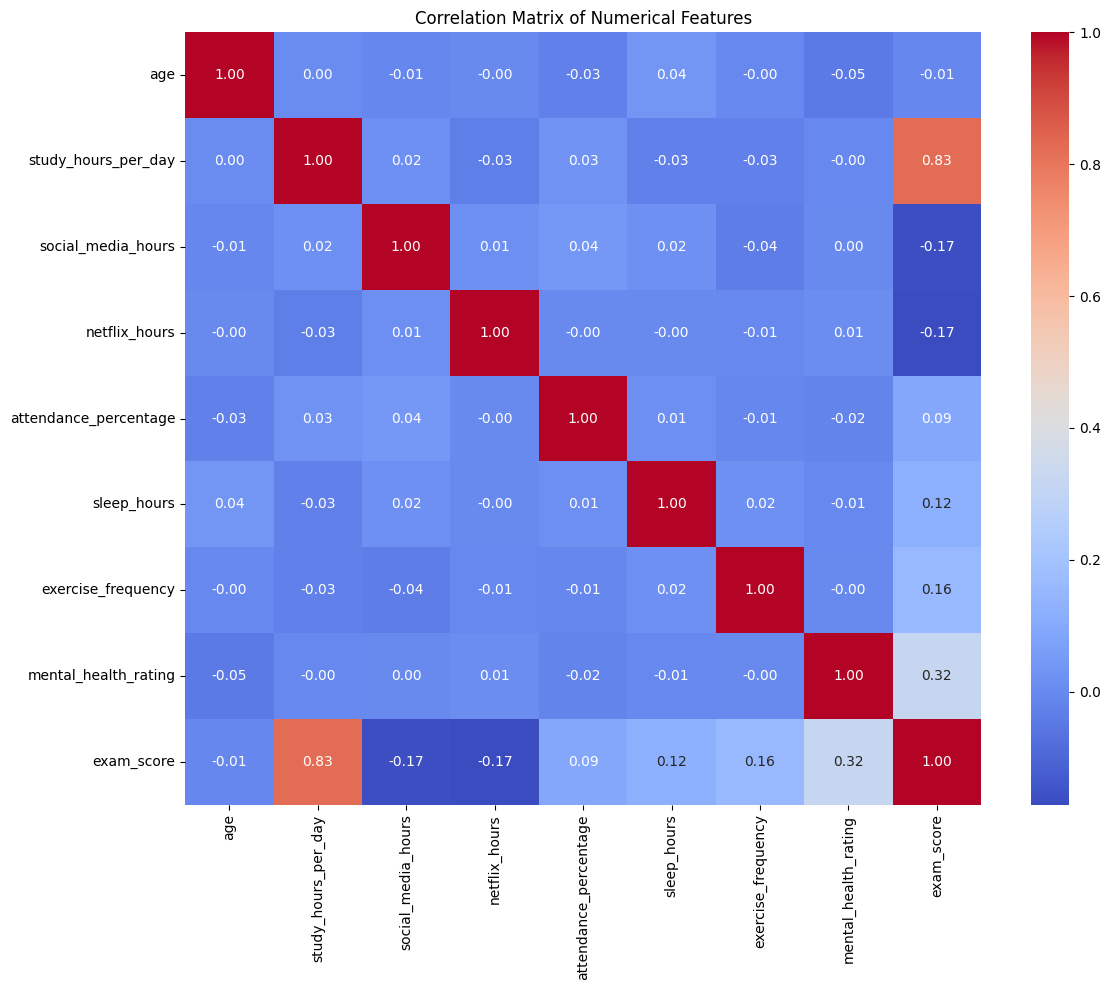

In [13]:
# Correlation matrix for numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()
plt.close()

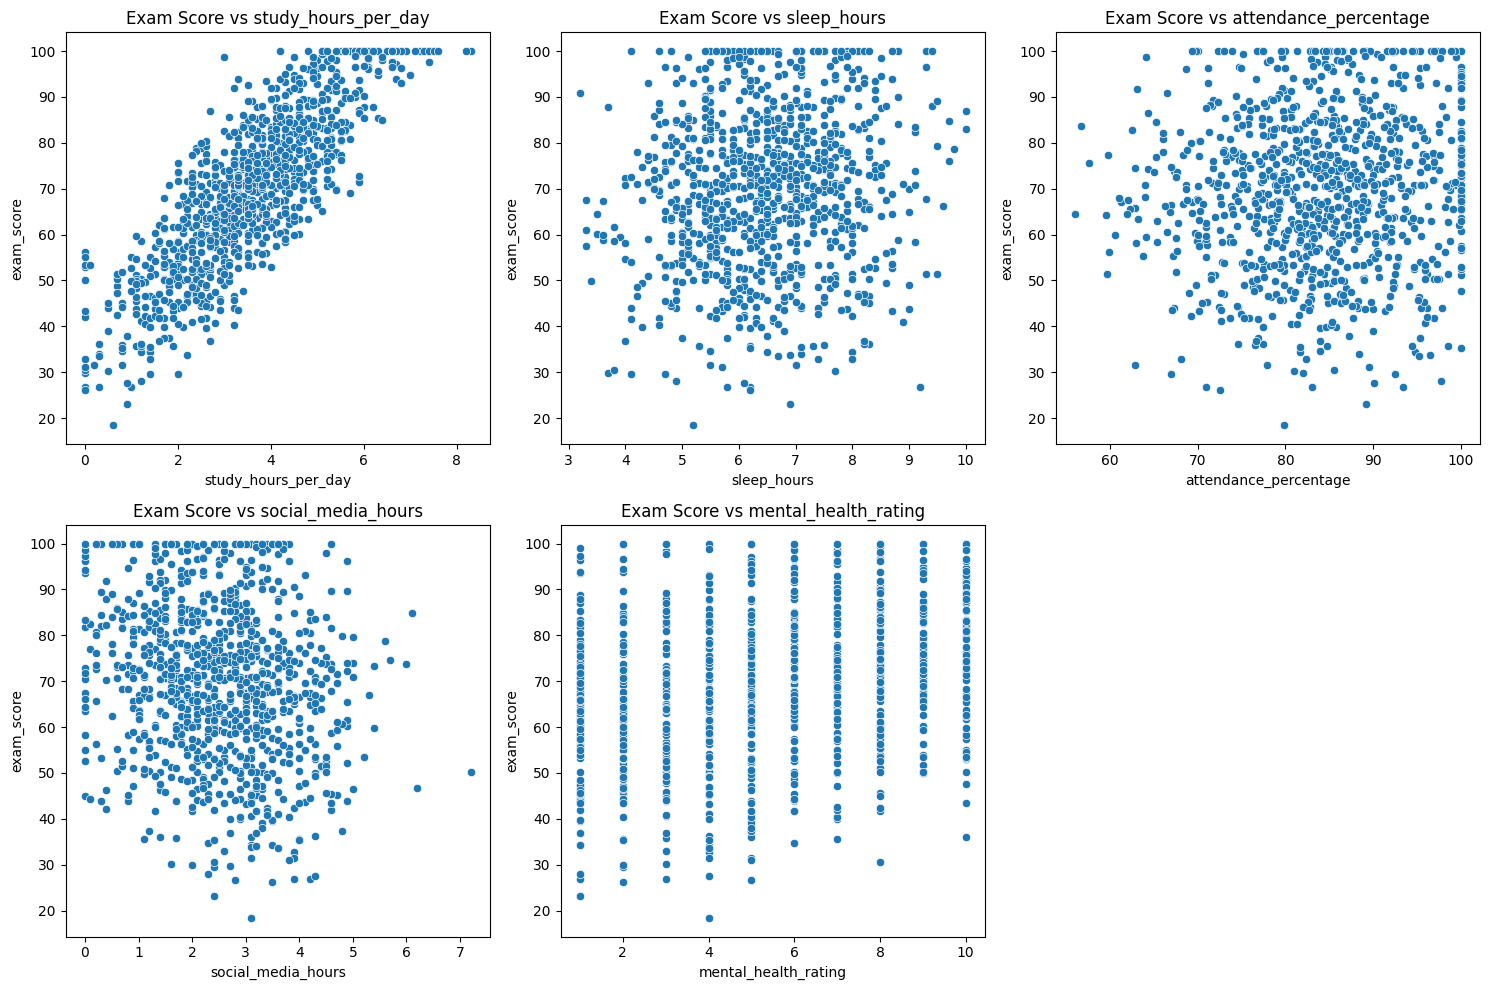

In [14]:
# Plot relationships between key features and exam scores
key_features = ['study_hours_per_day', 'sleep_hours', 'attendance_percentage',
                'social_media_hours', 'mental_health_rating']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=feature, y='exam_score', data=df)
    plt.title(f'Exam Score vs {feature}')
plt.tight_layout()
plt.show()
plt.close()

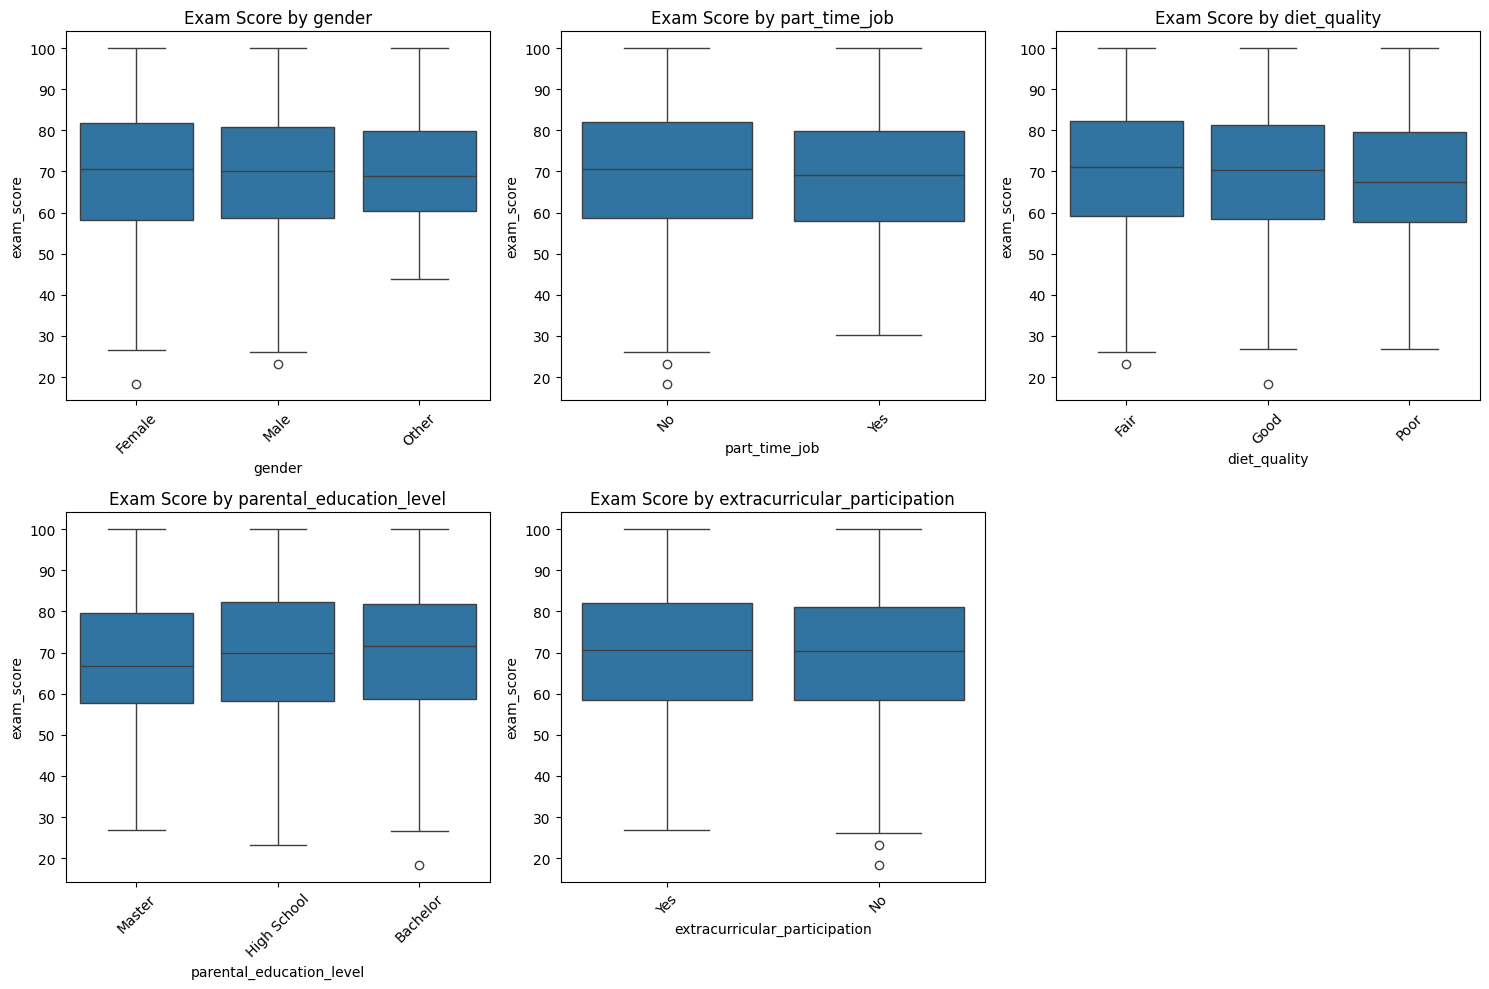

In [15]:
# Boxplots for categorical features
categorical_cols = ['gender', 'part_time_job', 'diet_quality',
                    'parental_education_level', 'extracurricular_participation']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=feature, y='exam_score', data=df)
    plt.title(f'Exam Score by {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()

# **Data Preprocessing**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Handle missing values
# For categorical columns - impute with mode (parental education level)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        print(f"Imputing missing values for {col} with mode")
        df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after handling:")
print(df.isnull().sum())

# Separate features and target
X = df.drop(['student_id', 'exam_score'], axis=1)
y = df['exam_score']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Create preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Imputing missing values for parental_education_level with mode

Missing values after handling:
student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64


# **Model Implementation**

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# A. Traditional Approach: Multiple Linear Regression
lin_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())])

# B. Advanced Approach: Random Forest Regression
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Train models
lin_reg_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['gender', 'part_time_job', 'diet_quality', 'parental_education_level',
       'internet_quality', 'extracurricular_participation'],
      dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

# **Model Evaluation Function**

In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

    # Print results
    print(f"\n{model_name} Results:")
    print(f"Training RMSE: {train_rmse:.2f}")
    print(f"Testing RMSE: {test_rmse:.2f}")
    print(f"Training MAE: {train_mae:.2f}")
    print(f"Testing MAE: {test_mae:.2f}")
    print(f"Training R²: {train_r2:.2f}")
    print(f"Testing R²: {test_r2:.2f}")
    print(f"5-Fold CV R² Scores: {cv_scores}")
    print(f"Mean CV R² Score: {np.mean(cv_scores):.2f}")

    return {
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'cv_r2_mean': np.mean(cv_scores)
    }

# Evaluate both models
lin_reg_metrics = evaluate_model(lin_reg_pipeline, X_train, X_test, y_train, y_test, "Linear Regression")
rf_metrics = evaluate_model(rf_pipeline, X_train, X_test, y_train, y_test, "Random Forest")


Linear Regression Results:
Training RMSE: 5.34
Testing RMSE: 5.15
Training MAE: 4.21
Testing MAE: 4.19
Training R²: 0.90
Testing R²: 0.90
5-Fold CV R² Scores: [0.89189841 0.91219394 0.88614259 0.90286889 0.88545938]
Mean CV R² Score: 0.90

Random Forest Results:
Training RMSE: 2.40
Testing RMSE: 6.22
Training MAE: 1.90
Testing MAE: 4.97
Training R²: 0.98
Testing R²: 0.85
5-Fold CV R² Scores: [0.85672522 0.87483531 0.83002545 0.87925331 0.82440819]
Mean CV R² Score: 0.85


# **Feature Importance Analysis (Random Forest)**

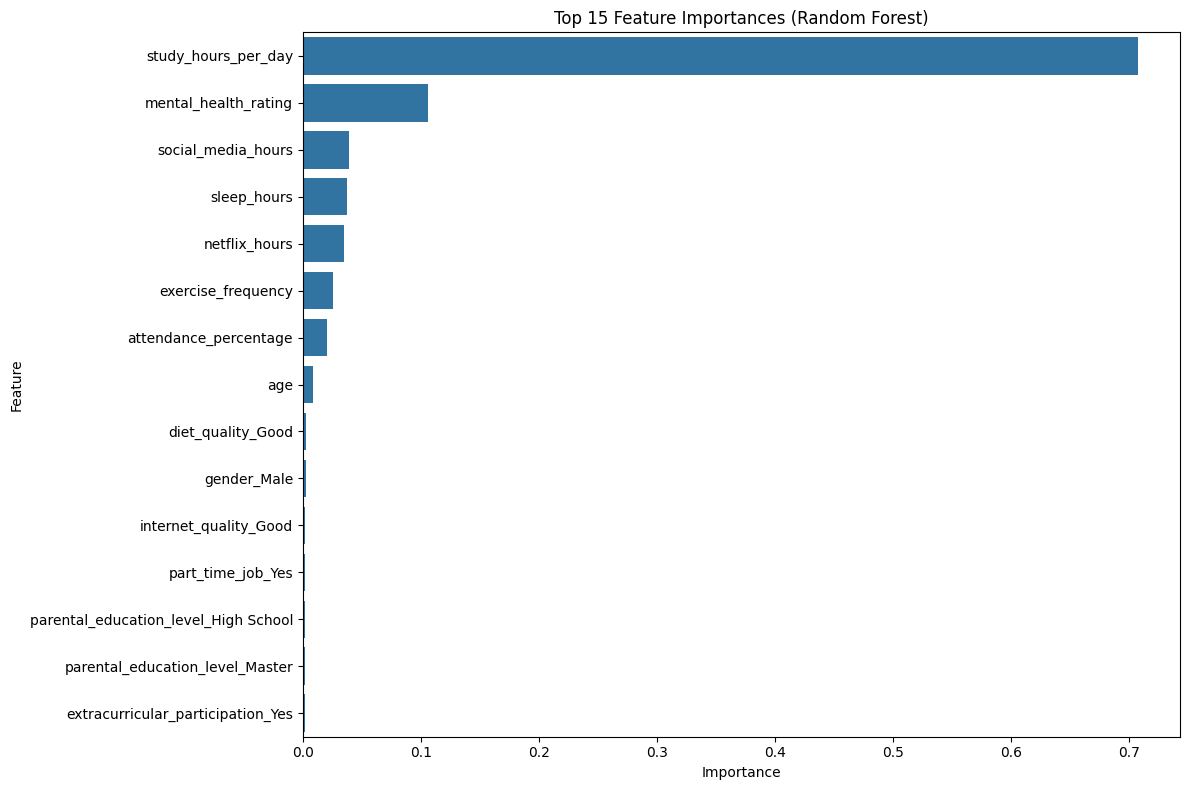

In [27]:
# Get the feature names after preprocessing
preprocessor = rf_pipeline.named_steps['preprocessor']
feature_names = numerical_cols.tolist()
for i, cat_col in enumerate(categorical_cols):
    categories = preprocessor.transformers_[1][1].categories_[i][1:]
    feature_names.extend([f"{cat_col}_{cat}" for cat in categories])

# Extract feature importance
rf_importances = rf_pipeline.named_steps['regressor'].feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_importances
})
importance_df = importance_df.sort_values('Importance', ascending=False).head(15)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Top 15 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()
plt.close()

# **Model Comparison Visualization**

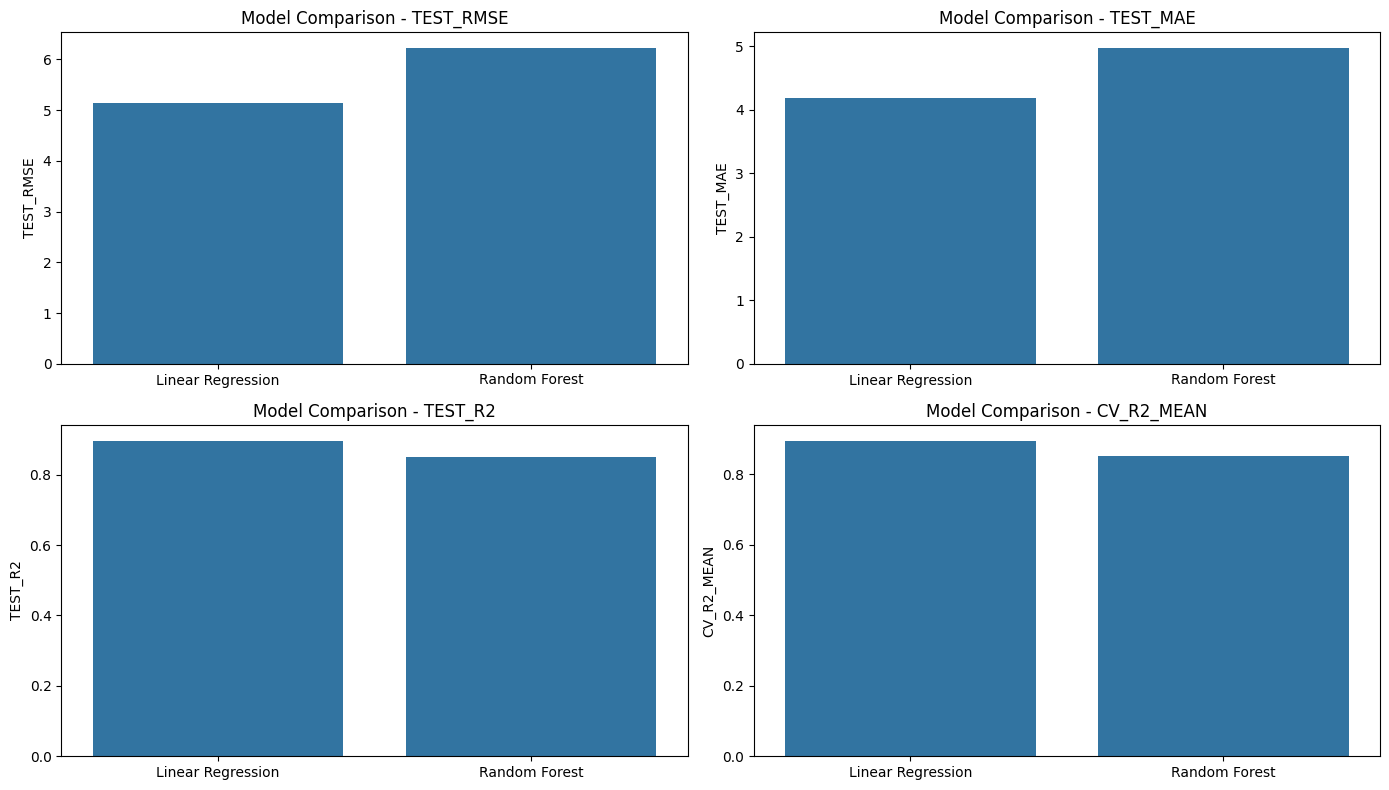

In [28]:
metrics = ['test_rmse', 'test_mae', 'test_r2', 'cv_r2_mean']
models = ['Linear Regression', 'Random Forest']
comparison_data = {
    'Linear Regression': [lin_reg_metrics[metric] for metric in metrics],
    'Random Forest': [rf_metrics[metric] for metric in metrics]}

plt.figure(figsize=(14, 8))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    metric_values = [comparison_data[model][i-1] for model in models]
    sns.barplot(x=models, y=metric_values)
    plt.title(f'Model Comparison - {metric.upper()}')
    plt.ylabel(metric.upper())
plt.tight_layout()
plt.show()
plt.close()

# **Conclusion**

In [30]:
print("\nCONCLUSION:")
print("Based on the analysis and model performance metrics, we can make the following observations:")
if rf_metrics['test_r2'] > lin_reg_metrics['test_r2']:
    print("- The Random Forest model outperformed Linear Regression in predicting exam scores,")
    print(f"  achieving an R² score of {rf_metrics['test_r2']:.2f} compared to {lin_reg_metrics['test_r2']:.2f}.")
    best_model = "Random Forest"
else:
    print("- The Linear Regression model performed surprisingly well compared to Random Forest,")
    print(f"  achieving an R² score of {lin_reg_metrics['test_r2']:.2f} compared to {rf_metrics['test_r2']:.2f}.")
    best_model = "Linear Regression"
print("- The most influential factors affecting exam scores according to our analysis are:")
for _, row in importance_df.head(5).iterrows():
    print(f"  * {row['Feature']}: {row['Importance']:.4f}")


CONCLUSION:
Based on the analysis and model performance metrics, we can make the following observations:
- The Linear Regression model performed surprisingly well compared to Random Forest,
  achieving an R² score of 0.90 compared to 0.85.
- The most influential factors affecting exam scores according to our analysis are:
  * study_hours_per_day: 0.7081
  * mental_health_rating: 0.1063
  * social_media_hours: 0.0388
  * sleep_hours: 0.0378
  * netflix_hours: 0.0350
